<a href="https://colab.research.google.com/github/Celsius1313/AdvancedAnalyticsML01/blob/main/ML_Project_Loan_Prediction_Celsio_Cosme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
# !pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [ ]:
import pandas as pd                                                                                     # Dataset manipulations library
import numpy as np                                                                                      # Numbers Dataset Manipulations library
import matplotlib.pyplot as plt                                                                         # Visual Ploting library
import seaborn as sns                                                                                   # Statistical Plots library
from sklearn import tree                                                                                # Tree Method to built tree details
from sklearn.model_selection import train_test_split                                                    # Train and Test selection funcion, Pre and Post Pruning
from sklearn.tree import DecisionTreeClassifier, plot_tree                                              # Model Selection Class, Ploting the tree function
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, accuracy_score   # Evaluation Metrics functions

## Loading the dataset

In [ ]:
data = pd.read_csv(r"C:\Users\P4773\Documents\Desktop_Folder_CelsioCosme_Work\McCOMBS UNIVERSITY OF TEXAS -- PGP - AIML\HANDS-ON PROJECTS\MACHINE LEARNING PROJECT\PERSONAL LOAN CAMPAIGN - PREDICTION\Loan_Modelling.csv")
df = data.copy()
df

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


## Data Overview

* Observations
* Sanity checks

In [ ]:
df[::1000]

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1000,1001,59,35,8,92691,4,0.7,1,91,0,1,0,0,0
2000,2001,28,2,22,95670,1,0.1,2,0,0,0,0,1,0
3000,3001,40,14,164,94720,1,4.3,2,0,1,0,0,0,0
4000,4001,62,37,93,93003,3,3.0,3,0,1,0,1,1,1


In [ ]:
df.head(7)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0


In [ ]:
df.tail(7)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


In [ ]:
print("The dataset have ", df.shape[0], " rows and ", df.shape[1], " columns.", sep="")

The dataset have 5000 rows and 14 columns.


#### **Observations**
- The Dataset have:
    * 5.000 rows;
    * 14 columns.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


#### **Observations:**
* We have 2 data types: **int64** and **float64**
* Were **13 columns** are **int64** type and **1 column** is **float64** type.

In [ ]:
print("***** Checking 'Null' values *****", df.isnull().sum(), sep="\n")
print("\n")
print("***** Checking 'NA' values *****", df.isna().sum(), sep="\n")

***** Checking 'Null' values *****
ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64


***** Checking 'NA' values *****
ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64


#### **Observations:**
* We have no **'NA'** ou **'NULL'** values in the dataset, we
can consider as a clean dataset

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


#### **Observations:**
We have a dataset with a good distribuition, beside on that, we need to consider that we can have Outliers for **Income** and  **Mortgage** features, a high average usage of the credits cards (**CCAvg**), and we identify that we have negative numbers in **Experience** feature and that isn't *True*.

In [ ]:
# Looking the irregular values on the "Experience" column.
df[df["Experience"] < 0].head(15)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [ ]:
print("'Experience' feature before treatment:\n", df["Experience"].sort_values(ascending=True).unique(), sep="") # Here, we are checking how the values inside "Experience" are populated

'Experience' feature before treatment:
[-3 -2 -1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20
 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]


In [ ]:
df["Experience"] = df["Experience"].apply(lambda x: x*-1 if x < 0 else x) # Here, we are making the data treatment inside "Experience"
print("'Experience' feature after treatment:\n", df["Experience"].sort_values(ascending=True).unique(), sep="") # Checking how the values inside "Experience" after treatment


'Experience' feature after treatment:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]


#### **Observations:**
After checking the data summary with **.describe()**, we found some invalid data in "Experience" variable that we have to transform/treate as the code shows above.

In [ ]:
# Checking the columns that we going to turn in categorical variables
print(df.columns.to_list(), end="\n")
categorical_cols = ["ZIPCode", "Education", "Personal_Loan", "Securities_Account", "CD_Account", "Online", "CreditCard"]
df[categorical_cols]=df[categorical_cols].astype(str)
print("\n\n ***** Dataset after columns conversion ***** \n")
print(df.info(), sep="")


['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']


 ***** Dataset after columns conversion ***** 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   object 
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   object 
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   object 
 10  Securities_Account  5000 non-null   object 
 11  CD_Account          5000 non-nu

#### **Observations:**
Now in the Dataset we have, 3 data types:
- int64;
- float64;
- object/categorical

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### **Uni and Bivariate Analysis**

Numerical columns to consider in 'histplot': ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']
Total: 6



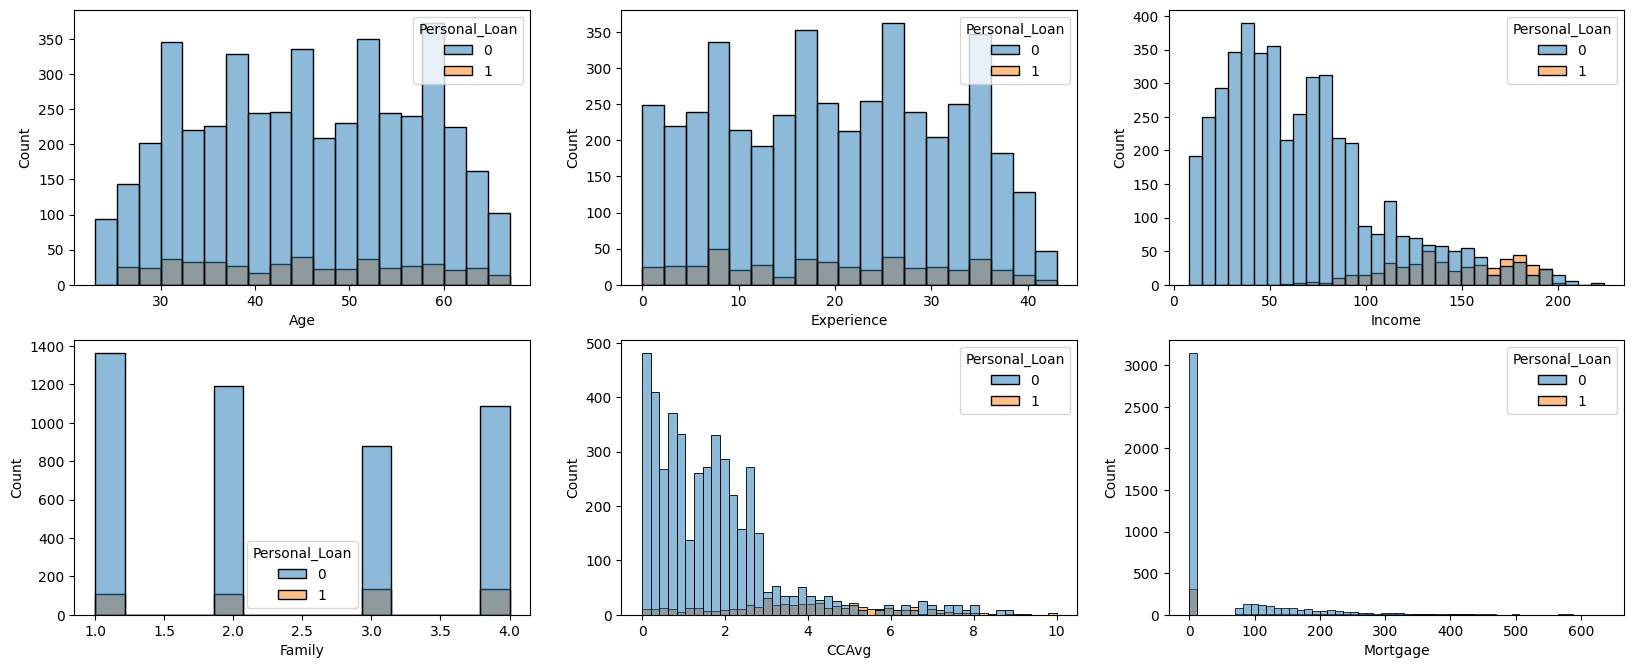

In [ ]:
numerical_columns = df.select_dtypes(exclude="object").columns.to_list()
print("Numerical columns to consider in 'histplot': ", numerical_columns[1:], "\nTotal: ", len(numerical_columns[1:]), sep="", end="\n\n")

plt.figure(figsize=(20,25))
for index, column in enumerate(numerical_columns[1:]):
    plt.subplot(6, 3, index+1)
    sns.histplot(df, x=column, hue="Personal_Loan");

#### **Observations:**
For the countinuos variables related to the target variable **Personal Loan**, we can note relevante insight that the highest the annual income the better is the possiblity of a Loan purchase.

Numerical columns to consider in 'boxplot': ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']
Total: 6



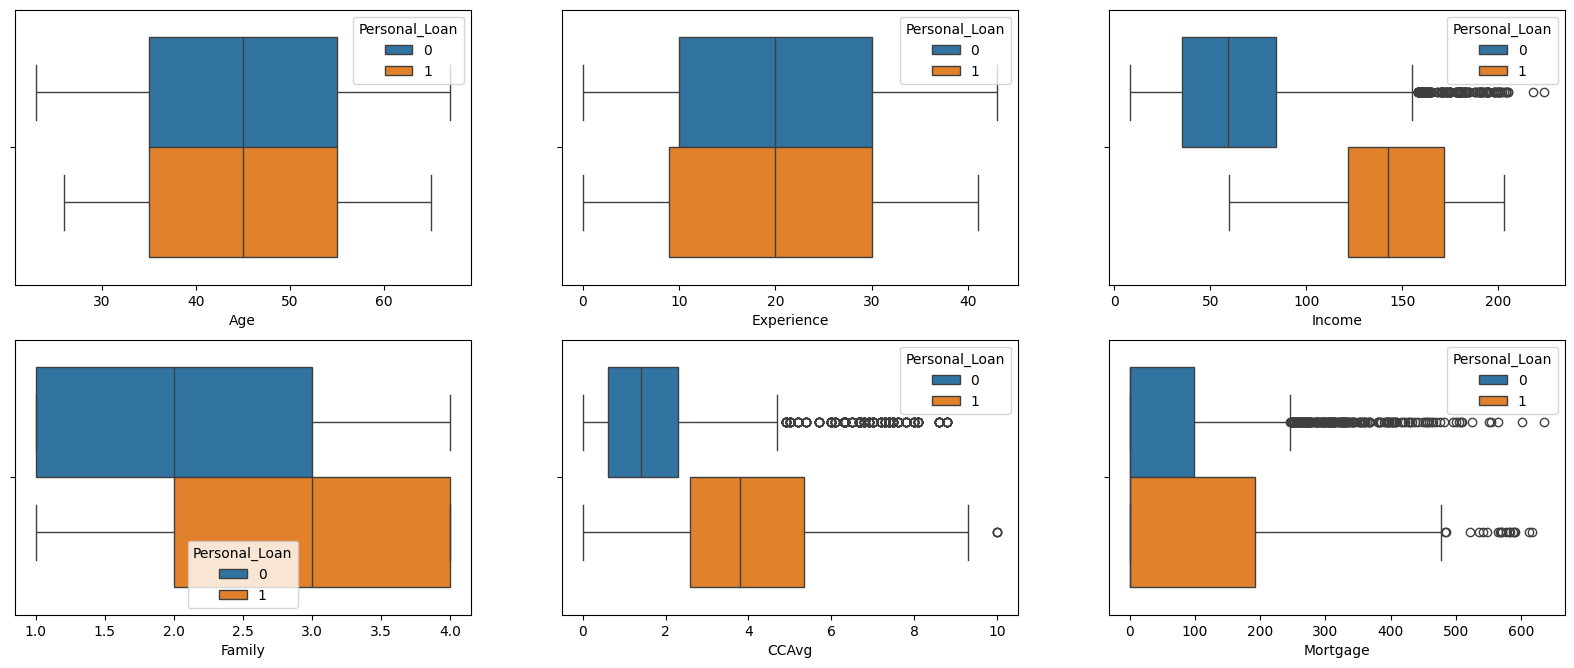

In [ ]:
numerical_columns = df.select_dtypes(exclude="object").columns.to_list()
print("Numerical columns to consider in 'boxplot': ", numerical_columns[1:], "\nTotal: ", len(numerical_columns[1:]), sep="", end="\n\n")

plt.figure(figsize=(20,25))
for index, column in enumerate(numerical_columns[1:]):
    plt.subplot(6, 3, index+1)
    sns.boxplot(df, x=column, hue="Personal_Loan");

#### **Observations:**
- Here with the boxplots we can note that people who have a **Personal Loan** the majority have:
    - A family with size equal or greater than 3;
    - Monthly average for credit card usage (CCAvg) is greater than 3.6K dollars;
    - The annual Income is greater than 135K dollars.

Non-numerical columns to consider in 'countplot': ['Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']
Total: 6



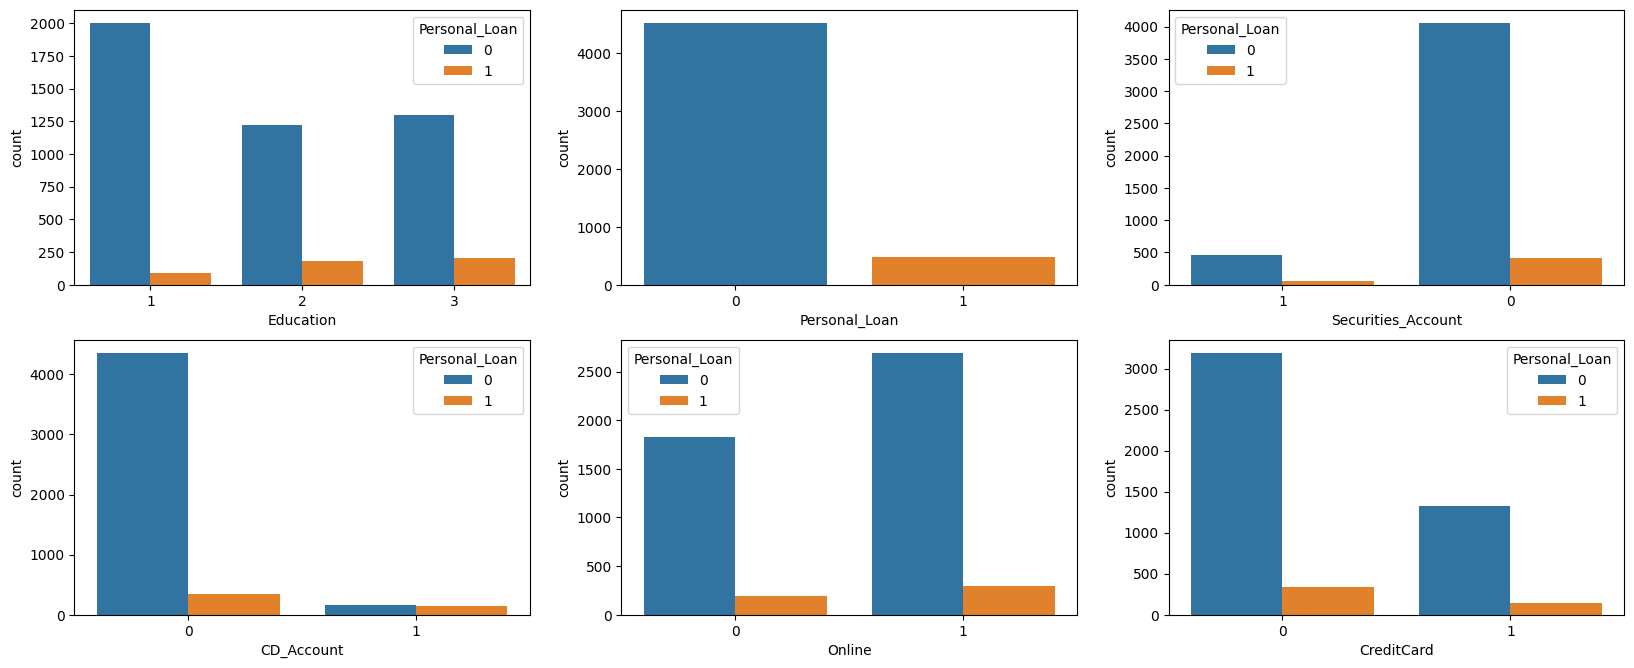

In [ ]:
print("Non-numerical columns to consider in 'countplot': ", categorical_cols[1:], "\nTotal: ", len(categorical_cols[1:]), sep="", end="\n\n")

plt.figure(figsize=(20,25))
for index, column in enumerate(categorical_cols[1:]):
    plt.subplot(6, 3, index+1)
    sns.countplot(df, x=column, hue="Personal_Loan")


#### **Observations:**
- For this visualizations, we can extract the following insights for those who have a **Personal Loan**:
    - They prefered to a internet bank app;
    - They mostly have a Professional/Advanced education;
    - They don't have a credit card in others Banks.

# **Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

### *1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?*

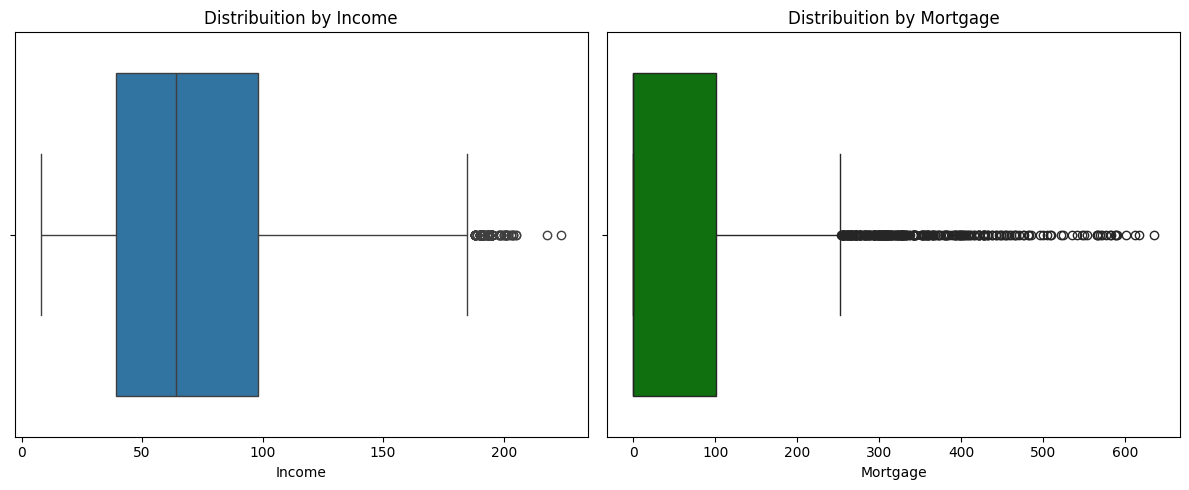

In [ ]:
# Our objective is plot more than one visual in same label.
# Here we going to configure in subplots: 1 for the number of row and 2 for the number of columns, we going to present a plot in a side of other.
# axes variable goint to represent the number of columns.

fig, axes = plt.subplots(1,2, figsize=(12,5))
sns.boxplot(df, x="Income", ax=axes[0])
axes[0].set_title("Distribuition by Income")
sns.boxplot(df, x="Mortgage", color="green", ax=axes[1])
axes[1].set_title("Distribuition by Mortgage")
plt.tight_layout();


#### **Observations:**
For **Mortgage**, we have a lot of Outliers Customers with a high value for their house mortgage, that fact needs to be analyzed very carefully, because most of the Custormers have a annual **Income** lower than the Mortgage.

### *2. How many customers have credit cards?*

In [ ]:
# We going to count total of Customers with a Credit Card in others Banks
df[df["CreditCard"] == "1"].groupby(["CreditCard"])[["ID"]].count().T

CreditCard,1
ID,1470


#### **Observations:**
We have 1.470 Customers with a credit card issued in others Banks, excluding the **AllLife Bank**

### *3. What are the attributes that have a strong correlation with the target attribute (personal loan)?*

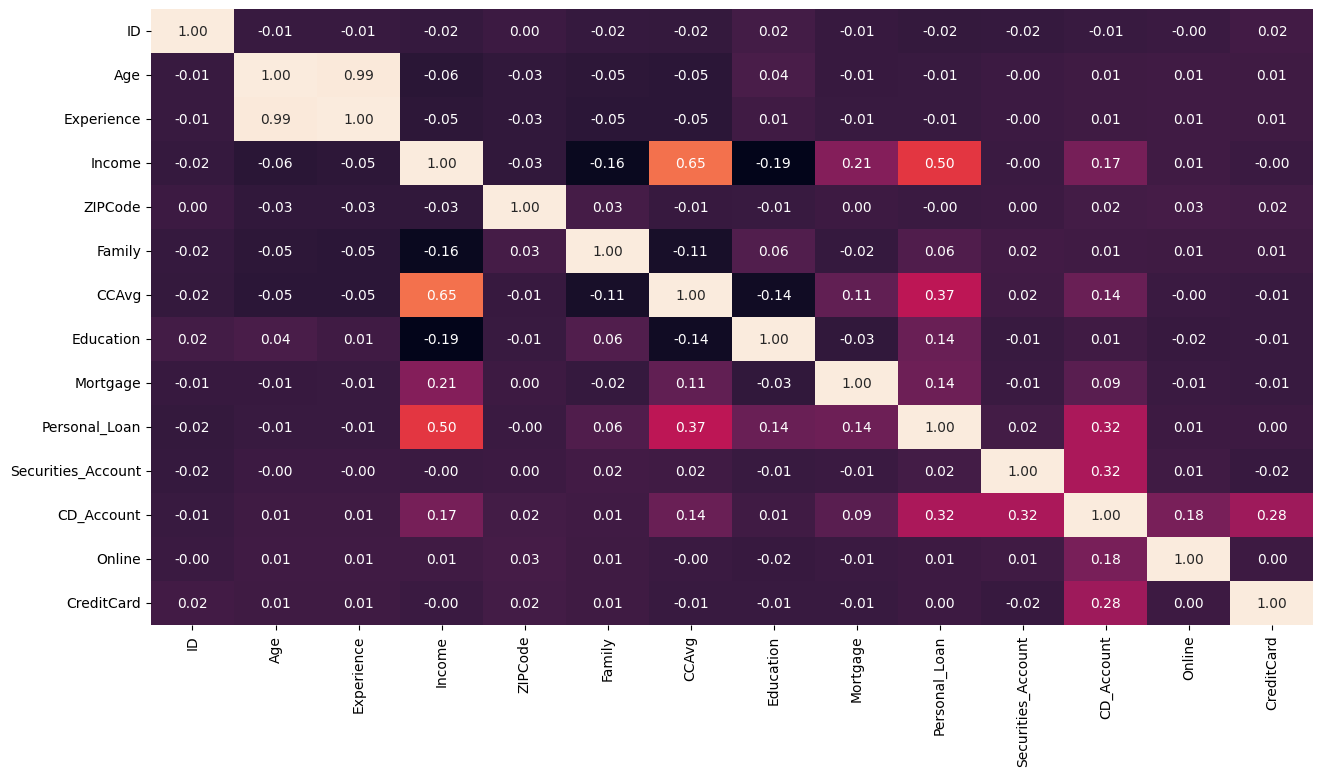

In [ ]:
plt.figure(figsize=(15,8))
df_corr_plotted = sns.heatmap(df.corr(), annot=True, cbar=False, fmt=".2f")
df_corr_plotted;

#### **Observations:**

The heatmap plot show us a strong positive correlation between **Experience** and **Age** (0.99), **CCAvg** and **Income** (0.65), **Personal Loan** and **Income** (0.50), but some this correlations can not affect the target variable prediction.

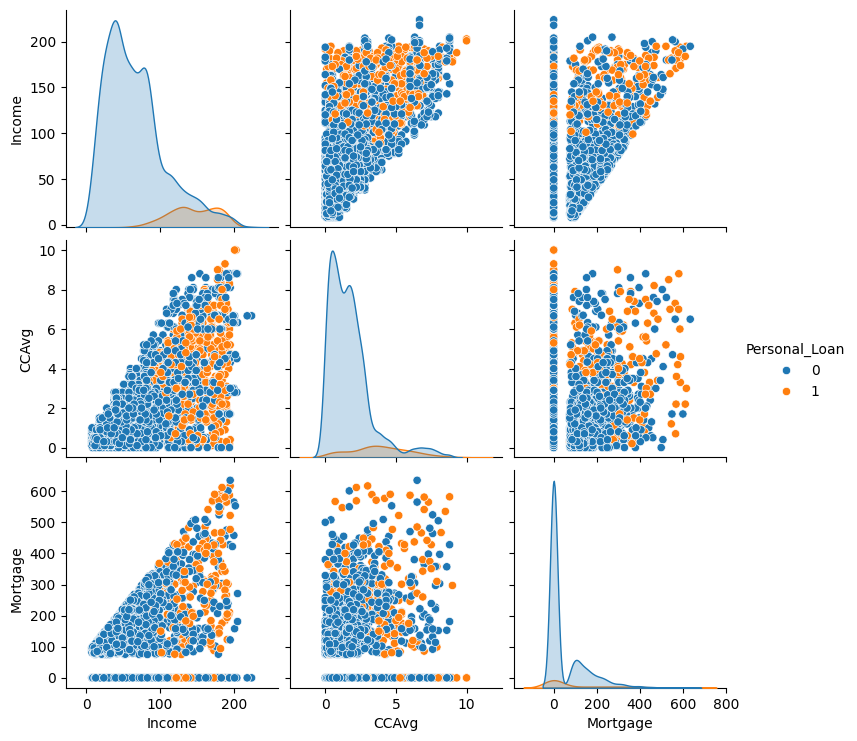

In [ ]:
sns.pairplot(df[["Income", "CCAvg", "Mortgage", "Personal_Loan"]], hue="Personal_Loan");

#### **Observations:**

On this pairplot we can understand more between the variables correlations, and we can conclude that people with a annual income higher than 100K dollars have more chance of do a **Personal Loan**.

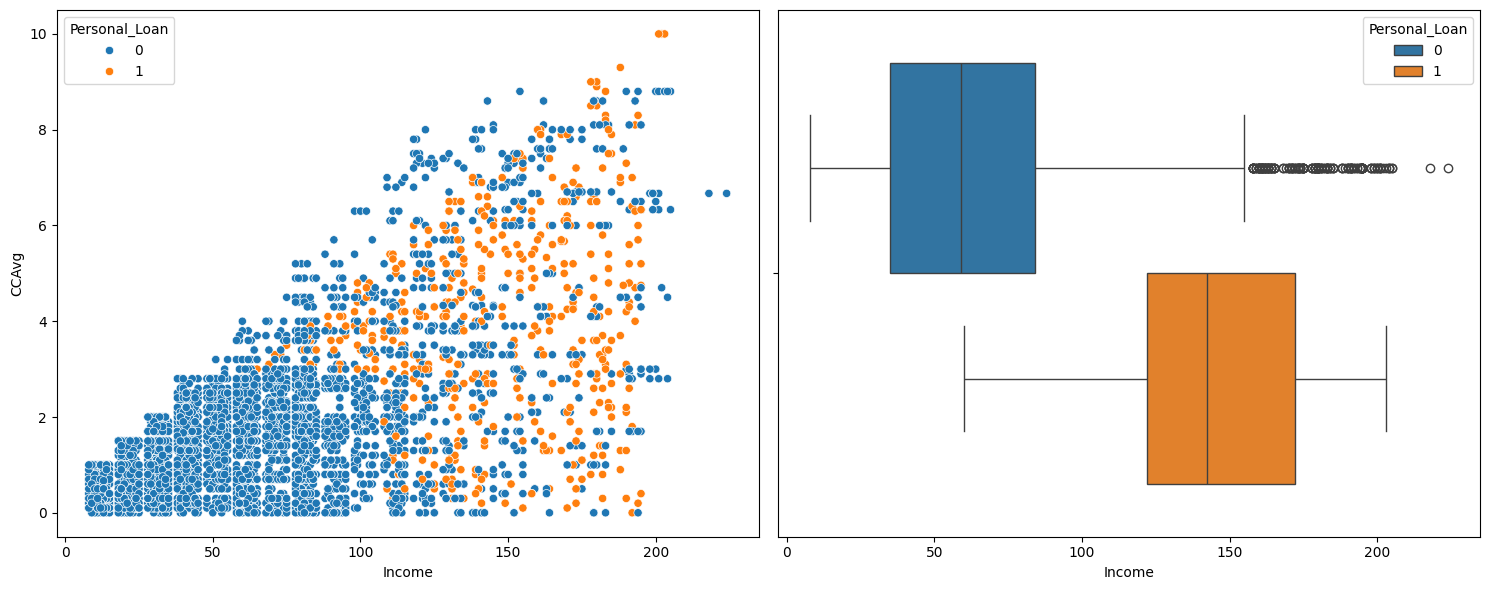

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,6))
sns.scatterplot(df, x="Income", y="CCAvg",  hue="Personal_Loan", ax=axes[0])
sns.boxplot(df, x="Income", hue="Personal_Loan", ax=axes[1])
plt.tight_layout();

#### **Observations:**

Here we can confirm our suspects about a independent variable that can be used to predict the target variable (**Personal Loan**), at least **75%** of the people that have a personal loan, their annual income is **150K to 210K** dollars.

#### **Observations:**
- The attributes that have a strong (positive) correlation with **Personal Loan** is:
1. Income with a 0.50 strengh of positive correlation;
2. CCAvg (The average of spending money used in a Credit Card) with a 0.37 strengh of positive correlation.

### *4. How does a customer's interest in purchasing a loan vary with their age?*

#### **Observations:**
Based on **Age**, the interest of purchasing a Loan isn't irrelevant, as show the plot below but people who have a Loan the is between 25 to 65 years old.

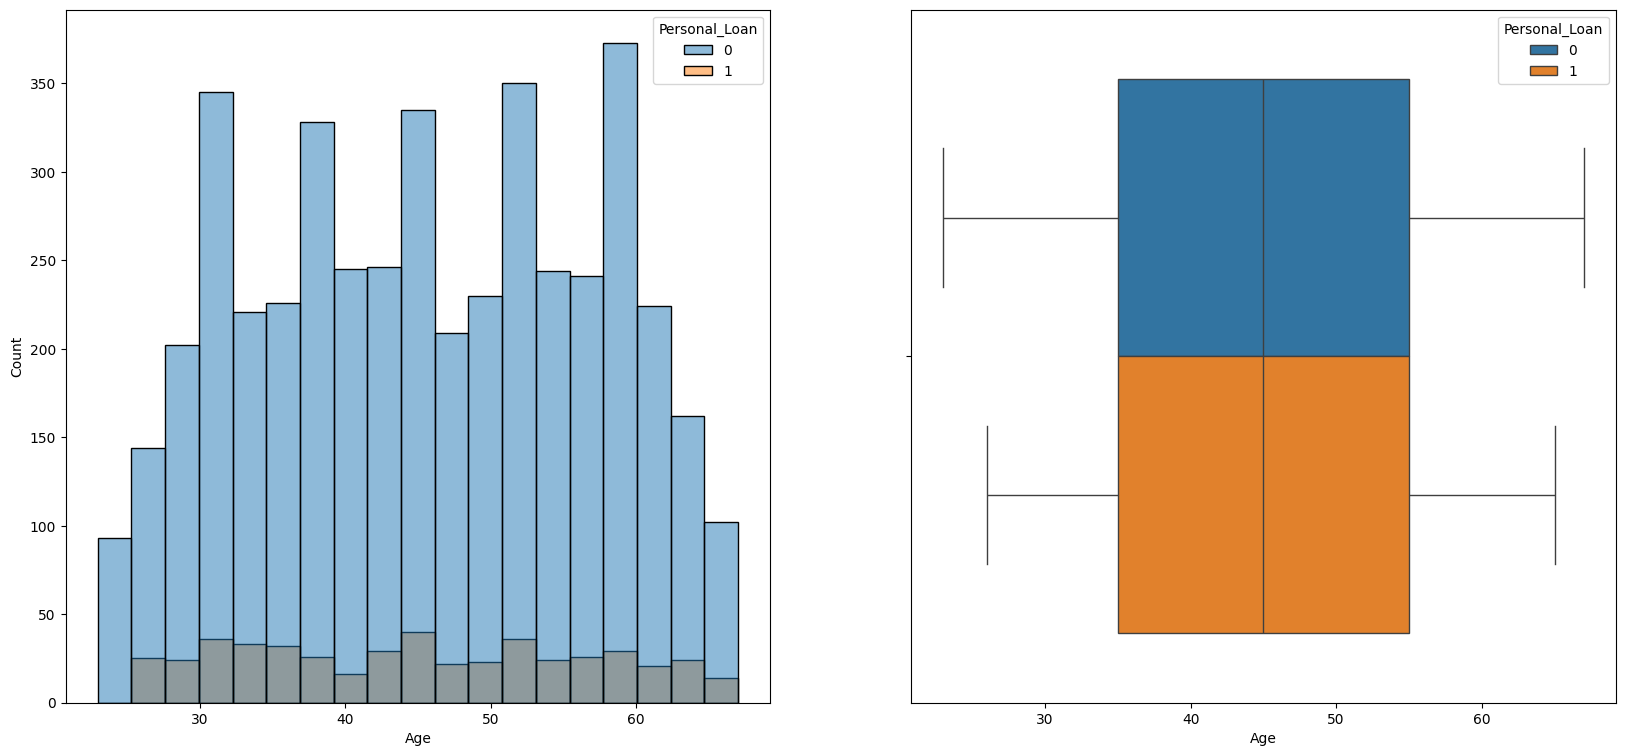

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,9))
sns.histplot(df, x="Age", hue="Personal_Loan", ax=axes[0])
sns.boxplot(df, x="Age", hue="Personal_Loan", ax=axes[1]);

### *5. How does a customer's interest in purchasing a loan vary with their education?*

#### **Observations:**
Based on their education, it's more probable a person that have a **Profissional** or **Advanced** Education be interested in purchasing a **Personal Loan**, as show the plot below.

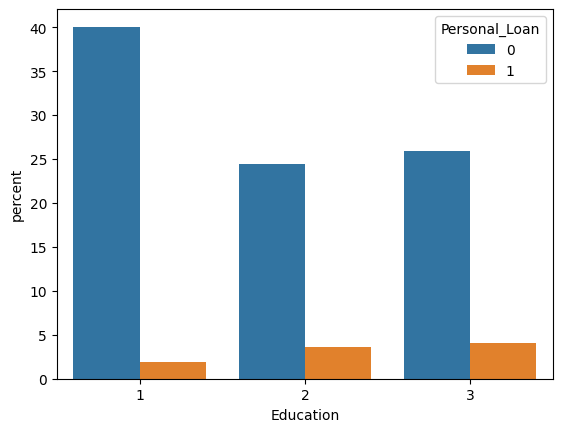

In [ ]:
sns.countplot(df, x="Education", stat="percent", hue="Personal_Loan");

## Data Preprocessing

* Missing value treatment =====> ***Done by me***
* Feature engineering (if needed) =====> ***Don't needed***
* Outlier detection and treatment (if needed) =====> ***Done by me***
* Preparing data for modeling =====> ***Done by me***
* Any other preprocessing steps (if needed) =====> ***Done by me***

#### **Outliers detection and treatment**

In [ ]:
# Calculate IQR (Inter Quartile)
Q1 = df[numerical_columns[1:]].quantile(0.25)
Q3 = df[numerical_columns[1:]].quantile(0.75)
IQR = Q3- Q1

lower_whisker = Q1 - 1.5*IQR
upper_whisker = Q3 + 1.5*IQR

((df[numerical_columns[1:]] < lower_whisker) | (df[numerical_columns[1:]] > upper_whisker)).sum() / df.shape[0] * 100
# We have a little percentage of Outliers in: "Income", "CCAvg", "Mortgage".

Age           0.00
Experience    0.00
Income        1.92
Family        0.00
CCAvg         6.48
Mortgage      5.82
dtype: float64

These are the columns with 'Outliers' values: ['Income', 'CCAvg', 'Mortgage']


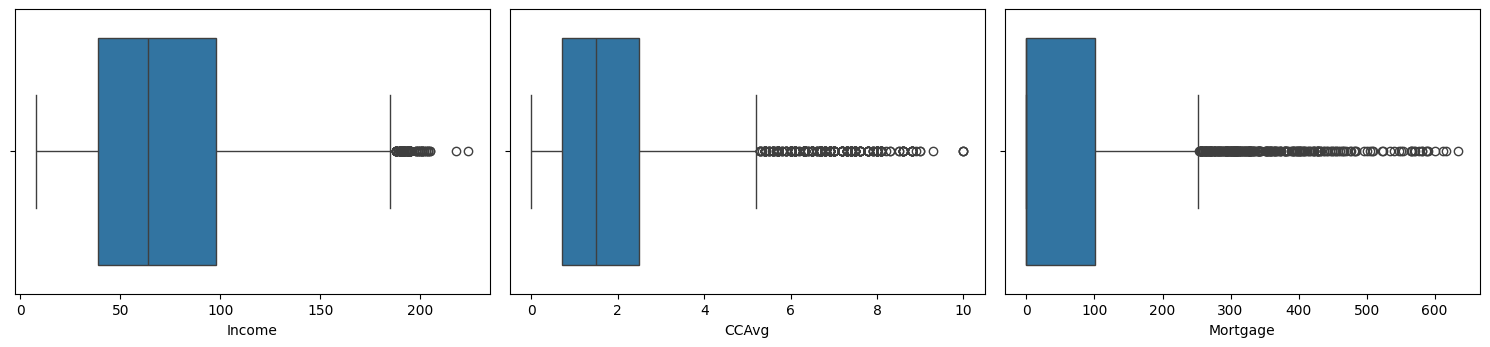

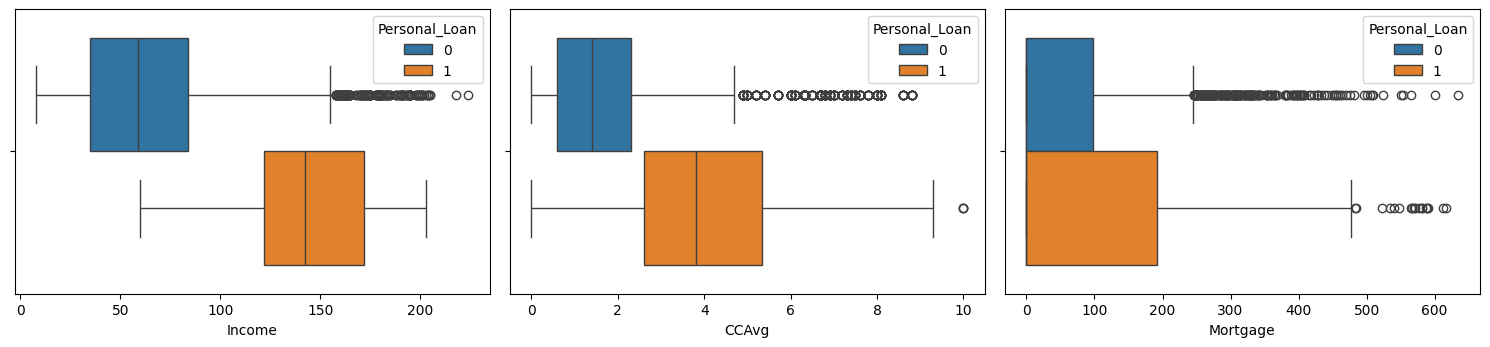

In [ ]:
# Creating a list with the Outliers Columns to Treat the Outliers in those columns, but only validating the numerical columns, without the "ID" column
outliers_Columns = list(
    df[numerical_columns[1:]].columns[(((df[numerical_columns[1:]] < lower_whisker) | (df[numerical_columns[1:]] > upper_whisker)).sum() / df.shape[0] > 0)]
    )

print("These are the columns with 'Outliers' values:", outliers_Columns)

plt.figure(figsize=(15,10))
for index, column in enumerate(outliers_Columns):
    plt.subplot(3, 3, index+1)
    sns.boxplot(df, x=column)
    plt.tight_layout();

plt.figure(figsize=(15,10))
for index, column in enumerate(outliers_Columns):
    plt.subplot(3, 3, index+1)
    sns.boxplot(df, x=column, hue="Personal_Loan")
    plt.tight_layout();

Outliers columns after treatment: ['Income', 'CCAvg', 'Mortgage']


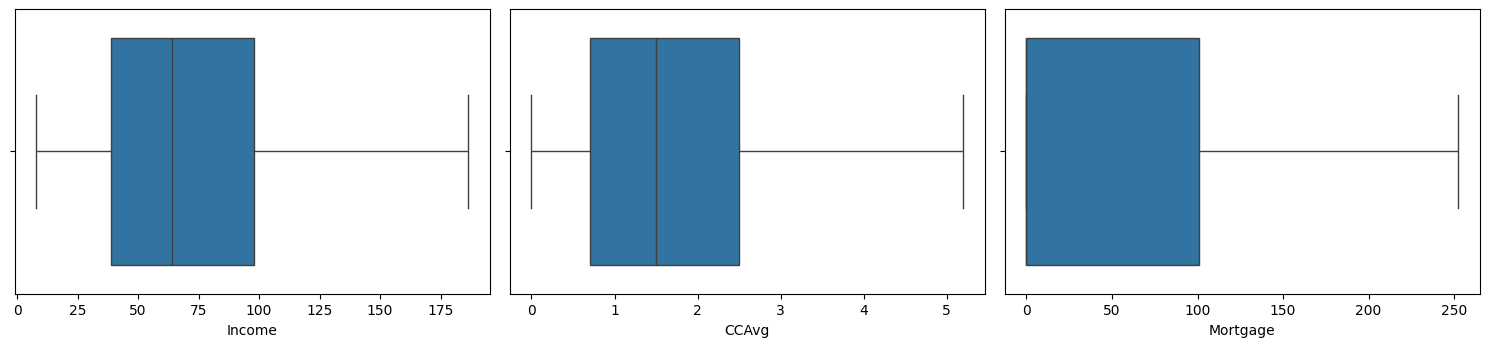

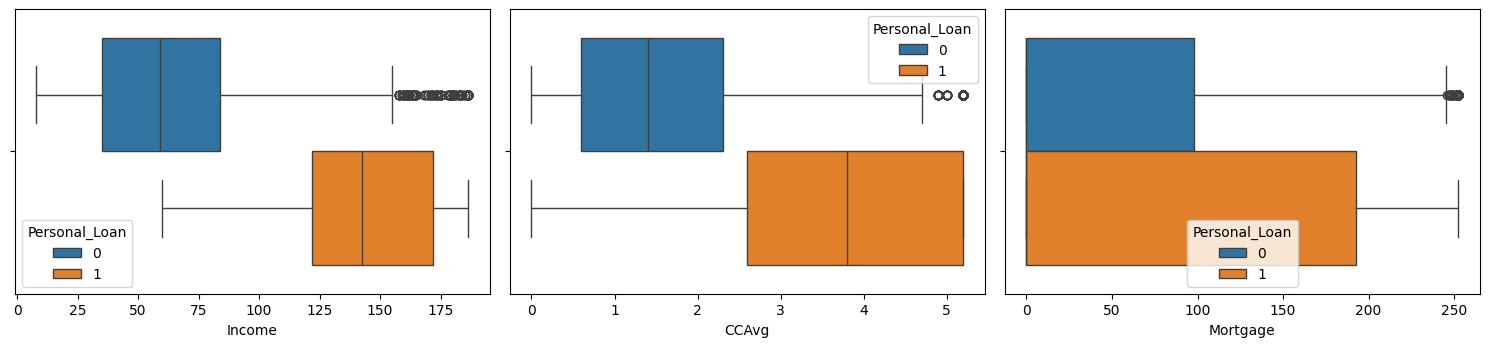

In [ ]:

for col in outliers_Columns:
     df[col] = np.clip(df[col], 0, upper_whisker[col])

print("Outliers columns after treatment:", outliers_Columns)

plt.figure(figsize=(15,10))
for index, column in enumerate(outliers_Columns):
    plt.subplot(3, 3, index+1)
    sns.boxplot(df, x=column)
    plt.tight_layout();

plt.figure(figsize=(15,10))
for index, column in enumerate(outliers_Columns):
    plt.subplot(3, 3, index+1)
    sns.boxplot(df, x=column, hue="Personal_Loan")
    plt.tight_layout();

#### **Preparing data for modeling**

In [ ]:
# Defining the Independent Variables (X) and the Target Variable (y):
X = df.drop(["Personal_Loan", "Experience"], axis=1) # ===> We are removing the "Experience" variable from the independent variable because their almost perfect correlation with "Age".
y = df["Personal_Loan"]
y = y.astype(int)

# Zip Code and Education conversion by Hot-Encoding Technique, to use them in the prediction model
X_dummies = pd.get_dummies(X, columns=["ZIPCode", "Family"], drop_first=True, dtype=float)

# Splitting the data into the training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X_dummies,
    y,
    test_size= .3,
    random_state=13
)

# Checking the Train and Test dataset splitting
print("Training set (With Independent Variable) ===>", X_train.shape[0], "registers.")
print("Test set (With Independent Variable) ===>", X_test.shape[0], "registers.", end="\n\n")
print("*** Target Variable - Training set distribuition '%' ***")
print(round(y_train.value_counts(normalize=True)*100, 2), "\n\n")
print("*** Target Variable - Testing set distribuition '%' ***")
print(round(y_test.value_counts(normalize=True)*100, 2))


Training set (With Independent Variable) ===> 3500 registers.
Test set (With Independent Variable) ===> 1500 registers.

*** Target Variable - Training set distribuition '%' ***
Personal_Loan
0    89.86
1    10.14
Name: proportion, dtype: float64 


*** Target Variable - Testing set distribuition '%' ***
Personal_Loan
0    91.67
1     8.33
Name: proportion, dtype: float64


## Model Building

### Model Evaluation Criterion

In [ ]:
# Creation of Evaluation Metrics Model

# Confusion Matrix
def confusion_matrix_func(model, Independent_var, target_var):
    """
    This function allow us to create a 'confusion matrix' to analyse the F1_Score for: TP, TN, FP, FN
    We need to define the:
        * target_var == y_train or y_test
        * Independent_var == X_train or X_test
    """

    predict_values = model.predict(Independent_var)
    cm = confusion_matrix(target_var, predict_values)

    # Create labels for each cell in the confusion matrix with both count and percentage
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)    # reshaping to a matrix

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="", cbar=False)
    plt.xlabel("Predicted Values")
    plt.ylabel("True Values");


# Model Performance
def model_performance_evaluator(model, Independent_var, target_var):
    """
    This function calculate all 4 metrics to evaluate the AI model: Accuracy, Precision, Recall, F1 Score
    We need to define the:
        * target_var == y_train or y_test
        * Independent_var == X_train or X_test
    """
    predict_values = model.predict(Independent_var)

    # Metrics:
    acc = round(accuracy_score(target_var, predict_values), 3)
    precision = round(precision_score(target_var, predict_values), 3)
    recall = round(recall_score(target_var, predict_values), 3)
    f1 = round(f1_score(target_var, predict_values), 3)

    # Create the dataframe to visualize the metrics:
    performance_df = pd.DataFrame(
        {"Accuracy": acc, "Precision": precision, "Recall": recall, "F1 Score": f1,},
        index=[0],
    )
    return performance_df

# Extra Model Evaluator: Plotted Tree
def plotted_tree(model, Independent_var):
    """
    This function going to plot a tree for our decision tree understand
        * Independent_var == X_train or X_test
    """
    # Configuring the node names based on the dataset columns:
    feature_names = list(Independent_var.columns)

    # plotting the decision tree
    plt.figure(figsize=(20, 20))
    dtree_plot = plot_tree(
        model,                              # decision tree classifier model
        feature_names=feature_names,        # list of feature names (columns) in the dataset
        filled=True,                        # fill the nodes with colors based on class
        fontsize=9,                         # font size into the node text
        node_ids=False,                     # hide the ID of each node
        class_names=None,                   # don't display class names
    )

    for branch in dtree_plot:
        arrow = branch.arrow_patch
        if arrow is not None:
            arrow.set_edgecolor("black")
            arrow.set_linewidth(2)

    plt.show()

    # printing a text report showing the rules the decision tree splitting and classification
    print(
        """
        ***********************************************
        *** Text Report: Rules of the Decision Tree ***
        ***********************************************
        """,
        tree.export_text(
            model,                          # Will get the defined model in the argument for plotted tree
            feature_names=feature_names,    # Will get the feature names (columns of the dataset) configured for plotted tree
            show_weights=True               # Show the weights associated with the model for each classification
        )
    )

### Model Building

In [ ]:
# creating an instance of the decision tree model
dtree_default = DecisionTreeClassifier(
    criterion="entropy",
    splitter="best",
    random_state=42
    )

# Fitting the model
dtree_default.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

##### *Model Results Evaluation - For Default Tree:*

*** Confusion Matrix - Training Evaluation ***


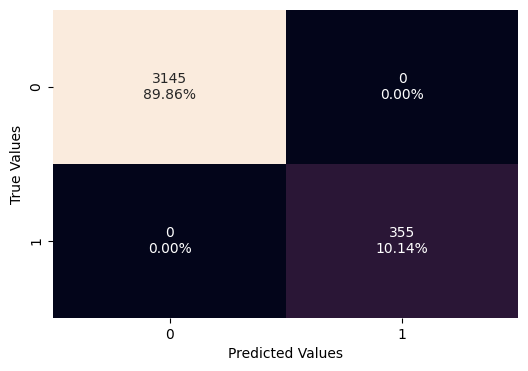

In [ ]:
print("*** Confusion Matrix - Training Evaluation ***")
confusion_matrix_func(dtree_default, X_train, y_train)

*** Confusion Matrix - Testing Evaluation ***


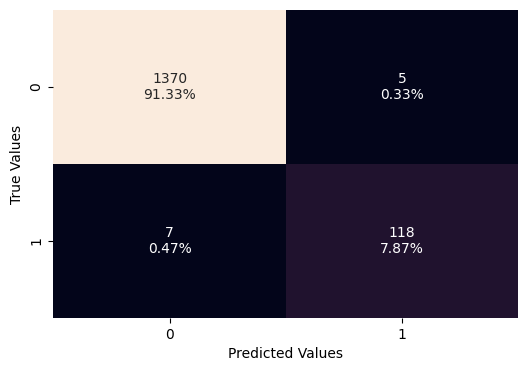

In [ ]:
print("*** Confusion Matrix - Testing Evaluation ***")
confusion_matrix_func(dtree_default, X_test, y_test)

In [ ]:
print("*** Metrics - Training Evaluation ***")
dtree_default_train_performance = model_performance_evaluator(dtree_default, X_train, y_train)
dtree_default_train_performance

*** Metrics - Training Evaluation ***


,Accuracy,Precision,Recall,F1 Score
0,1.0,1.0,1.0,1.0


In [ ]:
print("*** Metrics - Testing Evaluation ***")
dtree_default_test_performance = model_performance_evaluator(dtree_default, X_test, y_test)
dtree_default_test_performance

*** Metrics - Testing Evaluation ***


,Accuracy,Precision,Recall,F1 Score
0,0.992,0.959,0.944,0.952


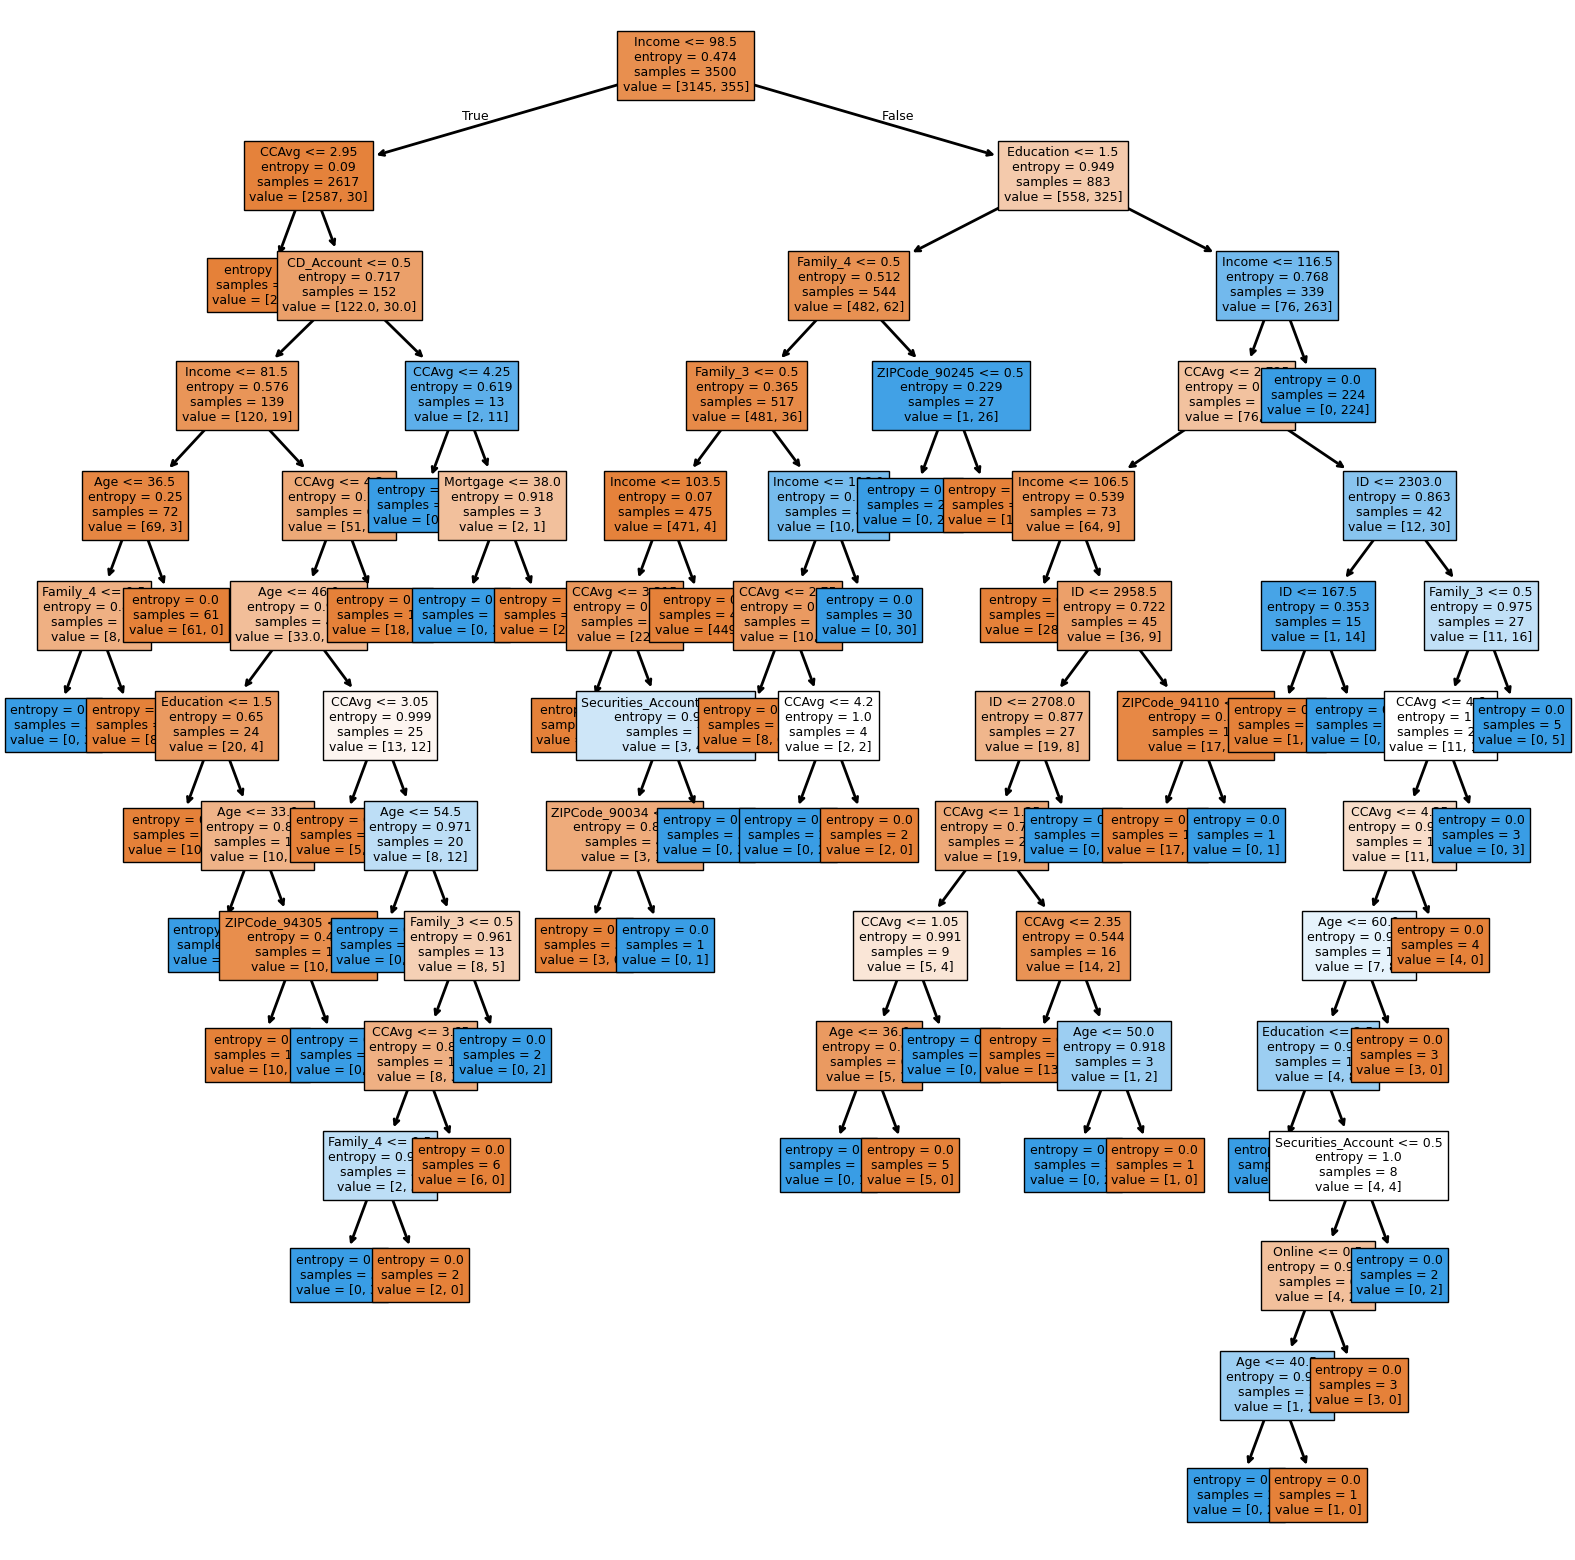


        ***********************************************
        *** Text Report: Rules of the Decision Tree ***
        ***********************************************
         |--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2465.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 81.50
|   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |   |--- weights: [0.00, 3.00] class: 1
|   |   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |   |--- weights: [8.00, 0.00] class: 0
|   |   |   |   |--- Age >  36.50
|   |   |   |   |   |--- weights: [61.00, 0.00] class: 0
|   |   |   |--- Income >  81.50
|   |   |   |   |--- CCAvg <= 4.20
|   |   |   |   |   |--- Age <= 46.00
|   |   |   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |   |   |--- weights: [10.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education >  1.50
|   |   |   |   |   |   |   |--- Age <= 33.00
|  

In [ ]:
plotted_tree(dtree_default, X_train)

## Model Performance Improvement

#### *Pre-pruning*

For Pre-pruning stage we going to define the lists for **max_depth**, **max_leaf_nodes**, **min_samples_split** parameters of a Decision Tree, to try to performance and avoid under and overfitting.
Choosing at end **best estimator** based on best_test_score

In [ ]:
# defining the parameters ranges of the tree to iterate over hyperparameters of tree
max_depth_values = np.arange(2, 11, 2)
max_leaf_nodes_values = np.arange(10, 51, 10)
min_samples_split_values = np.arange(10, 51, 10)

# initialize variables to store the best model and its perormance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # initialize the tree with the current set parameters
            estimator = DecisionTreeClassifier(
                criterion="entropy",
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split
            )

            # fit the model to the training data
            estimator.fit(X_train, y_train)

            # make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # calculate F1 scores or training and test sets
            train_f1_score = f1_score(y_train, y_train_pred)
            test_f1_score = f1_score(y_test, y_test_pred)

            # calculate the absolute dierence between training and test F1 scores
            score_diff = abs(train_f1_score - test_f1_score)

            # update the best estimator and best score if the current one has a smaller score diference
            if (score_diff < best_score_diff) & (test_f1_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_f1_score
                best_estimator = estimator

# Printing the best parameters
print("***** Best parameters *****")
print("Max depth:", best_estimator.max_depth)
print("Max leaf nodes:", best_estimator.max_leaf_nodes)
print("Min samples split:", best_estimator.min_samples_split)
print("Best Score Diff:", round(best_score_diff, 3))
print("Best F1 Score test:", round(best_test_score, 3))

***** Best parameters *****
Max depth: 6
Max leaf nodes: 40
Min samples split: 10
Best Score Diff: 0.004
Best F1 Score test: 0.942


In [ ]:
# Creating the Pre-pruned model using the best estimator
prePruned_dtree = best_estimator
prePruned_dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=40,
                       min_samples_split=10)

##### *Model Results Evaluation - For Pre-pruned Tree:*

*** Confusion Matrix - Training Evaluation ***


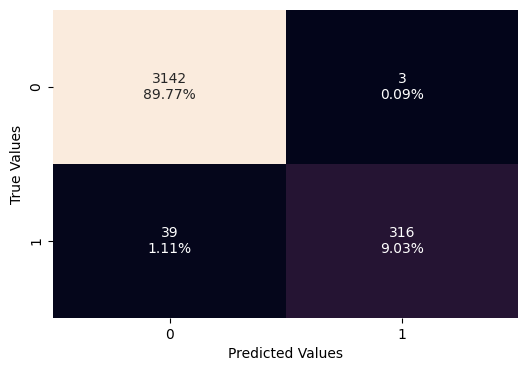

In [ ]:
print("*** Confusion Matrix - Training Evaluation ***")
confusion_matrix_func(prePruned_dtree, X_train, y_train)

*** Confusion Matrix - Testing Evaluation ***


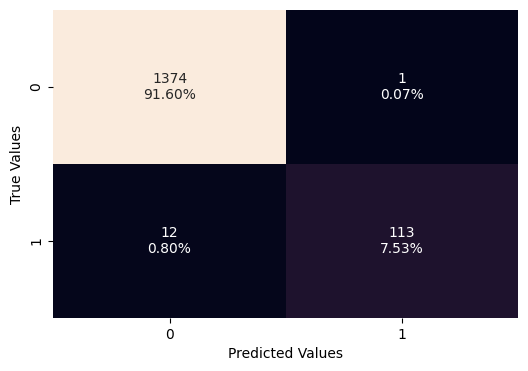

In [ ]:
print("*** Confusion Matrix - Testing Evaluation ***")
confusion_matrix_func(prePruned_dtree, X_test, y_test)

In [ ]:
print("*** Metrics - Training Evaluation ***")
prePruned_dtree_train_performance = model_performance_evaluator(prePruned_dtree, X_train, y_train)
prePruned_dtree_train_performance


*** Metrics - Training Evaluation ***


,Accuracy,Precision,Recall,F1 Score
0,0.988,0.991,0.89,0.938


In [ ]:
print("*** Metrics - Testing Evaluation ***")
prePruned_dtree_test_performance = model_performance_evaluator(prePruned_dtree, X_test, y_test)
prePruned_dtree_test_performance

*** Metrics - Testing Evaluation ***


,Accuracy,Precision,Recall,F1 Score
0,0.991,0.991,0.904,0.946


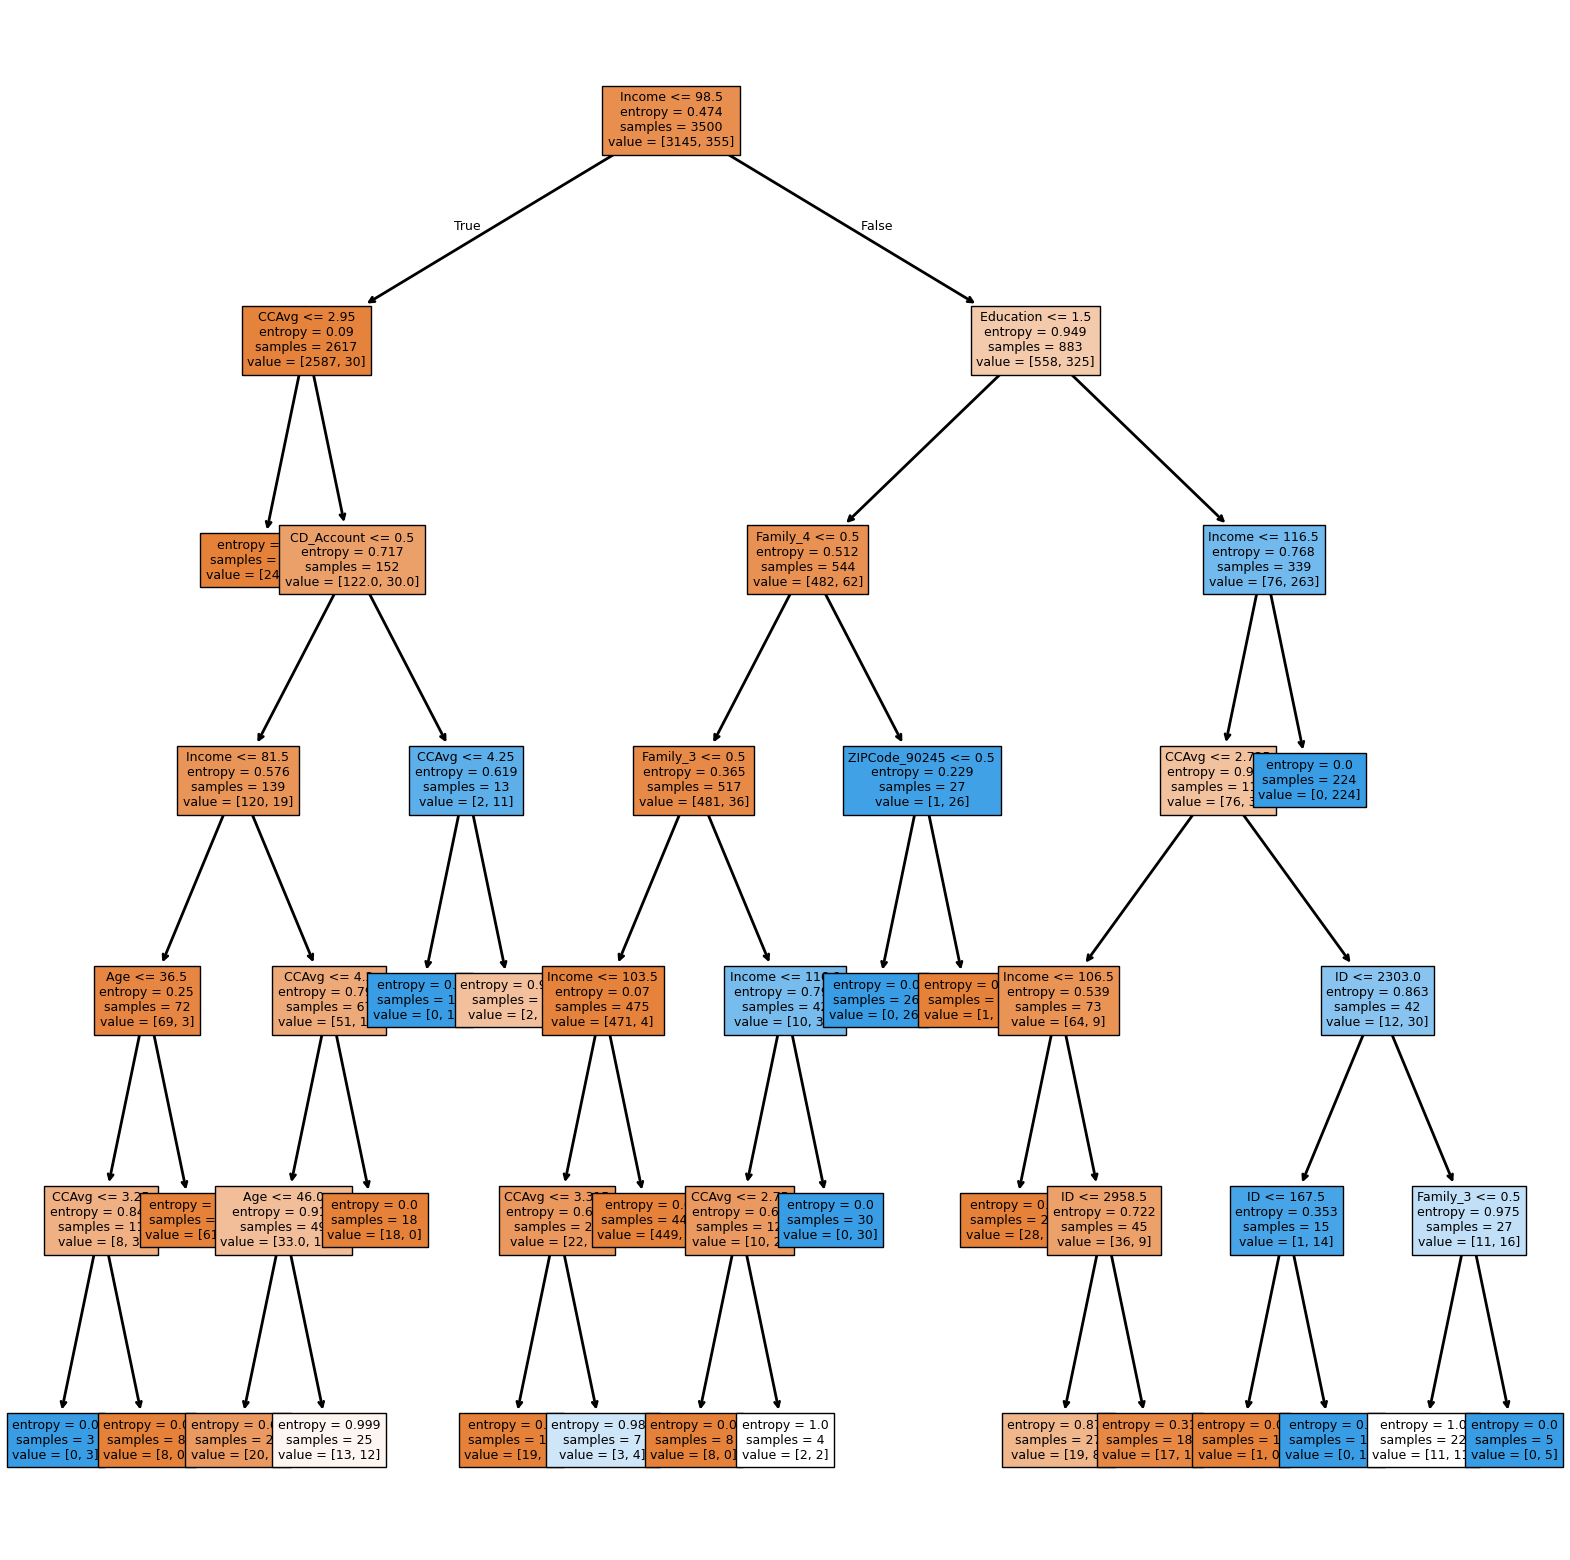


        ***********************************************
        *** Text Report: Rules of the Decision Tree ***
        ***********************************************
         |--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2465.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 81.50
|   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |--- CCAvg <= 3.25
|   |   |   |   |   |   |--- weights: [0.00, 3.00] class: 1
|   |   |   |   |   |--- CCAvg >  3.25
|   |   |   |   |   |   |--- weights: [8.00, 0.00] class: 0
|   |   |   |   |--- Age >  36.50
|   |   |   |   |   |--- weights: [61.00, 0.00] class: 0
|   |   |   |--- Income >  81.50
|   |   |   |   |--- CCAvg <= 4.20
|   |   |   |   |   |--- Age <= 46.00
|   |   |   |   |   |   |--- weights: [20.00, 4.00] class: 0
|   |   |   |   |   |--- Age >  46.00
|   |   |   |   |   |   |--- weights: [13.00, 12.00] class: 0
|   |   |   |   |--- CCAvg >  4.20
|   |   |   |   | 

In [ ]:
plotted_tree(prePruned_dtree, X_train)

#### *Post-pruning*

In Post-pruning stage we going to use the **cost_complexity_pruning_path()** to try to reduce the overfitting if exists deleting all splits and nodes that give us a lower gain and performance, and don't reduce the error in the model.
Beside on that, we going to use the **ccp_alphas** method, to choose the best Cost Complexity Pruning

In [ ]:
classifier = DecisionTreeClassifier(random_state=1)                     # Creating an instance of the decision tree model for post-pruning
path = classifier.cost_complexity_pruning_path(X_train, y_train)        # Calculate the cost complexity pruning (CCP) path for the model using the training data
ccp_alphas = abs(path.ccp_alphas)                                       # Extract the array of effective alphas from the pruning path using "ccp_alphas" method
impurities = path.impurities                                            # Extract the array of total impurities at each alpha along the pruning path using the "impurities" method

pd.DataFrame(path)                                                      # Visualizing the df with all ccp_alpha (Cost Complexity Pruning Alpha) and their respective Impurity calculation

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000277,0.001108
2,0.000282,0.001672
3,0.000285,0.002242
4,0.000381,0.002623
5,0.000408,0.003440
6,0.000429,0.003868
7,0.000468,0.004803
8,0.000476,0.005756
9,0.000486,0.009156


- Next, we train a decision tree using the effective alphas, calculated above.
- The last value in **ccp_alphas** is the alpha value that prunes the whole tree,
leaving the corresponding tree with one node.

In [ ]:
# Initialize an empty list to store the decision tree classifiers
classifiers = []

for ccp_alpha in ccp_alphas:
    # Create an instance of the DecisionTreeClassifier using the iteration of ccp_alphas
    classifier = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=42)

    # Fit the classifier to the training data
    classifier.fit(X_train, y_train)

    # Append the trained classifier to the list
    classifiers.append(classifier)

# Print the number of nodes in the tree along with its ccp_alpha value
print(
    "Number of nodes in tree is", classifiers[-1].tree_.node_count, "with ccp_alpha ==>", round(ccp_alphas[-1], 3)
)

Number of nodes in tree is 1 with ccp_alpha ==> 0.05


In [ ]:
# Remove the last classifier and corresponding ccp_alpha value from the lists, beacause the last ccp_alphas givu us only 1 node for our tree.
classifiers = classifiers[:-1]
ccp_alphas = ccp_alphas[:-1]

In [ ]:
train_f1_scores = []  # Initialize an empty list to store F1 scores for training set for each decision tree classifier

for clf in classifiers:
    pred_train = clf.predict(X_train)
    f1_train = f1_score(y_train, pred_train)
    train_f1_scores.append(f1_train)


test_f1_scores = []  # Initialize an empty list to store F1 scores for test set for each decision tree classifier

for clf in classifiers:
    pred_test = clf.predict(X_test)
    f1_test = f1_score(y_test, pred_test)
    test_f1_scores.append(f1_test)

In [ ]:
# creating the model where we get highest test F1 Score, based on their index (np.argmax) in the list of F1 Score results, because the test show us the way how model the with a new data
index_best_model = np.argmax(test_f1_scores)
print("Best Test Index:", index_best_model, "< ==== > Best Test Result:", round(test_f1_scores[index_best_model], 3))

# selcting the decision tree model corresponding to the highest test score, allowing us to choose the best ccp_alphas value by position or index to create a Post-pruned Tree
postPruned_dtree = classifiers[index_best_model]
postPruned_dtree

Best Test Index: 20 < ==== > Best Test Result: 0.934


DecisionTreeClassifier(ccp_alpha=0.0008099720508358385, random_state=42)

##### *Model Results Evaluation - For Post-pruned Tree:*

*** Confusion Matrix - Training Evaluation ***


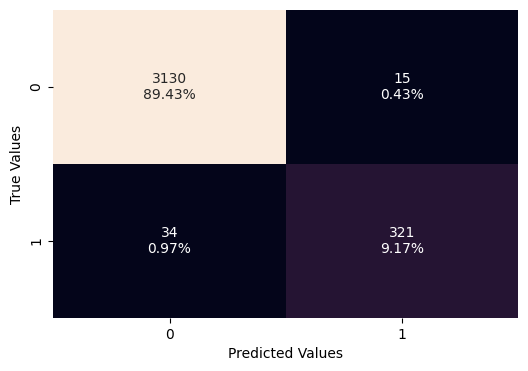

In [ ]:
print("*** Confusion Matrix - Training Evaluation ***")
confusion_matrix_func(postPruned_dtree, X_train, y_train)

*** Confusion Matrix - Testing Evaluation ***


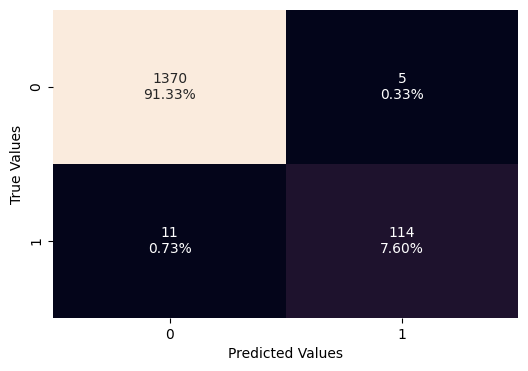

In [ ]:
print("*** Confusion Matrix - Testing Evaluation ***")
confusion_matrix_func(postPruned_dtree, X_test, y_test)

In [ ]:
print("*** Metrics - Training Evaluation ***")
postPruned_dtree_train_performance = model_performance_evaluator(postPruned_dtree, X_train, y_train)
postPruned_dtree_train_performance

*** Metrics - Training Evaluation ***


,Accuracy,Precision,Recall,F1 Score
0,0.986,0.955,0.904,0.929


In [ ]:
print("*** Metrics - Testing Evaluation ***")
postPruned_dtree_test_performance = model_performance_evaluator(postPruned_dtree, X_test, y_test)
postPruned_dtree_train_performance

*** Metrics - Testing Evaluation ***


,Accuracy,Precision,Recall,F1 Score
0,0.986,0.955,0.904,0.929


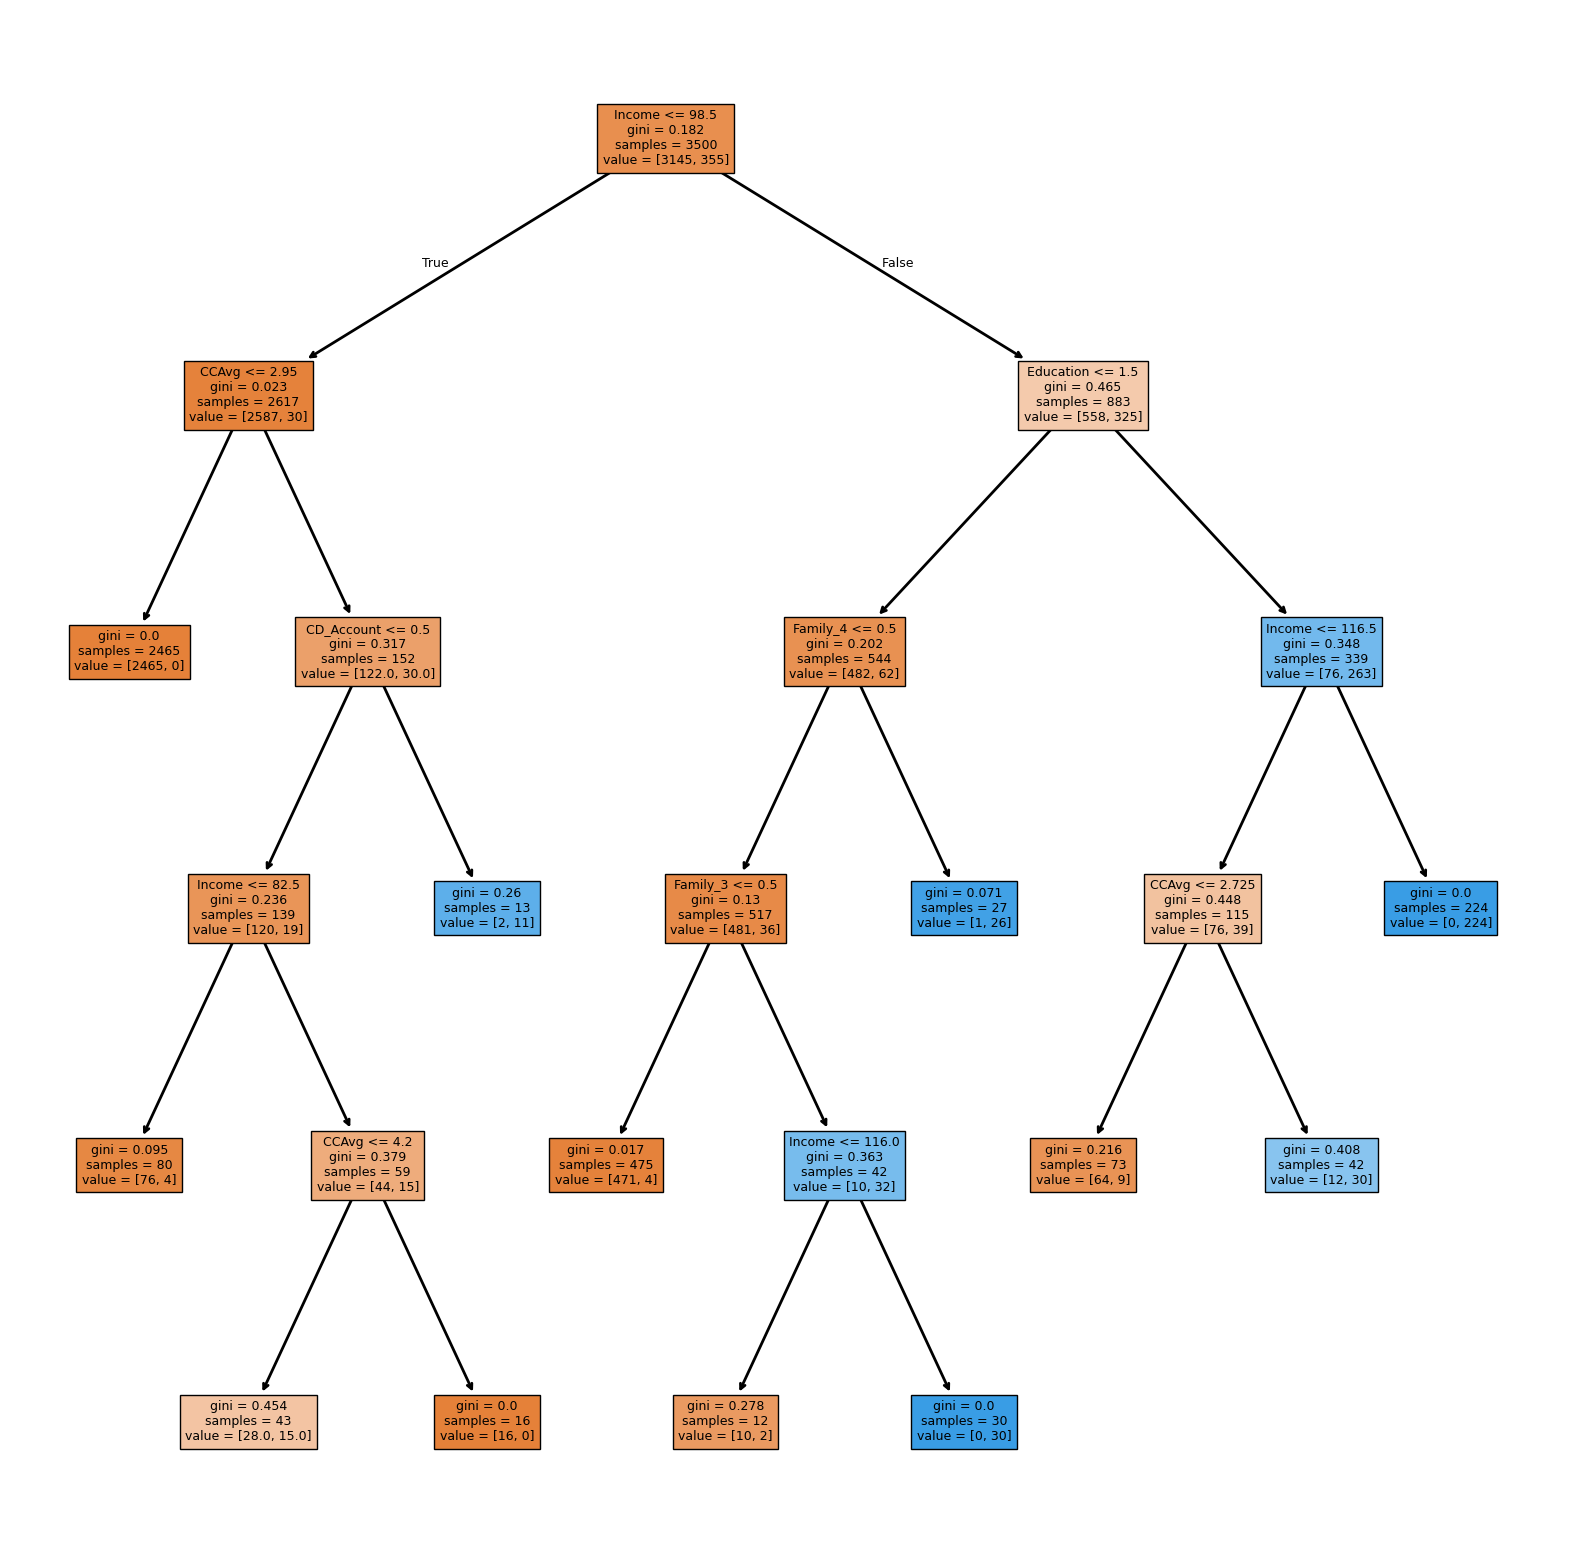


        ***********************************************
        *** Text Report: Rules of the Decision Tree ***
        ***********************************************
         |--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2465.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 82.50
|   |   |   |   |--- weights: [76.00, 4.00] class: 0
|   |   |   |--- Income >  82.50
|   |   |   |   |--- CCAvg <= 4.20
|   |   |   |   |   |--- weights: [28.00, 15.00] class: 0
|   |   |   |   |--- CCAvg >  4.20
|   |   |   |   |   |--- weights: [16.00, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [2.00, 11.00] class: 1
|--- Income >  98.50
|   |--- Education <= 1.50
|   |   |--- Family_4 <= 0.50
|   |   |   |--- Family_3 <= 0.50
|   |   |   |   |--- weights: [471.00, 4.00] class: 0
|   |   |   |--- Family_3 >  0.50
|   |   |   |   |--- Income <= 116.00
|   |   |   |   |   |--- weights: [10.00, 2.00] class

In [ ]:
plotted_tree(postPruned_dtree, X_train)

## Model Performance Comparison and Final Model Selection

In [ ]:
# Creating the Performance Comparison

models_comparision_df = pd.concat(
    [
        dtree_default_train_performance.T,
        dtree_default_test_performance.T,
        dtree_default_test_performance.T - dtree_default_train_performance.T,
        prePruned_dtree_train_performance.T,
        prePruned_dtree_test_performance.T,
        prePruned_dtree_test_performance.T - prePruned_dtree_train_performance.T,
        postPruned_dtree_train_performance.T,
        postPruned_dtree_test_performance.T,
        postPruned_dtree_test_performance.T - postPruned_dtree_train_performance.T,
    ],
    axis=1,
)
models_comparision_df.columns = [
    "Training Decision Tree (default)",
    "Testing Decision Tree (default)",
    "Default - Diff",
    "Training Decision Tree (Pre-Pruning)",
    "Testing Decision Tree (Pre-Pruning)",
    "Pre-puning - Diff",
    "Training Decision Tree (Post-Pruning)",
    "Testing Decision Tree (Post-Pruning)",
    "Post-pruning - Diff",
]
print("*** Model Performance Comparison 'MPC' ***")
models_comparision_df

*** Model Performance Comparison 'MPC' ***


,Training Decision Tree (default),Testing Decision Tree (default),Default - Diff,Training Decision Tree (Pre-Pruning),Testing Decision Tree (Pre-Pruning),Pre-puning - Diff,Training Decision Tree (Post-Pruning),Testing Decision Tree (Post-Pruning),Post-pruning - Diff
Accuracy,1.0,0.992,-0.008,0.988,0.991,0.003,0.986,0.989,0.003
Precision,1.0,0.959,-0.041,0.991,0.991,0.000,0.955,0.958,0.003
Recall,1.0,0.944,-0.056,0.890,0.904,0.014,0.904,0.912,0.008
F1 Score,1.0,0.952,-0.048,0.938,0.946,0.008,0.929,0.934,0.005


- Both the pre-pruned and post-pruned decision trees generalize well.

- The pre-pruned decision tree has a good performance on training and test sets.
    - This model uses a few more features for decision-making than the post-pruned decision tree.
    - This will result in a slightly longer prediction time but it is likely to yield better results on unseen data.

- The post-pruned decision tree has a good performance too on the test set than the training set.
    - This model have less 1 feature for decision-making than the pre-pruned tree.
    - This will result in a low prediction time but their performance on the unseen data is lower than the pre-pruned model.

- We'll move ahead with the pre-pruned decision tree as our final model.

## Feature Importance

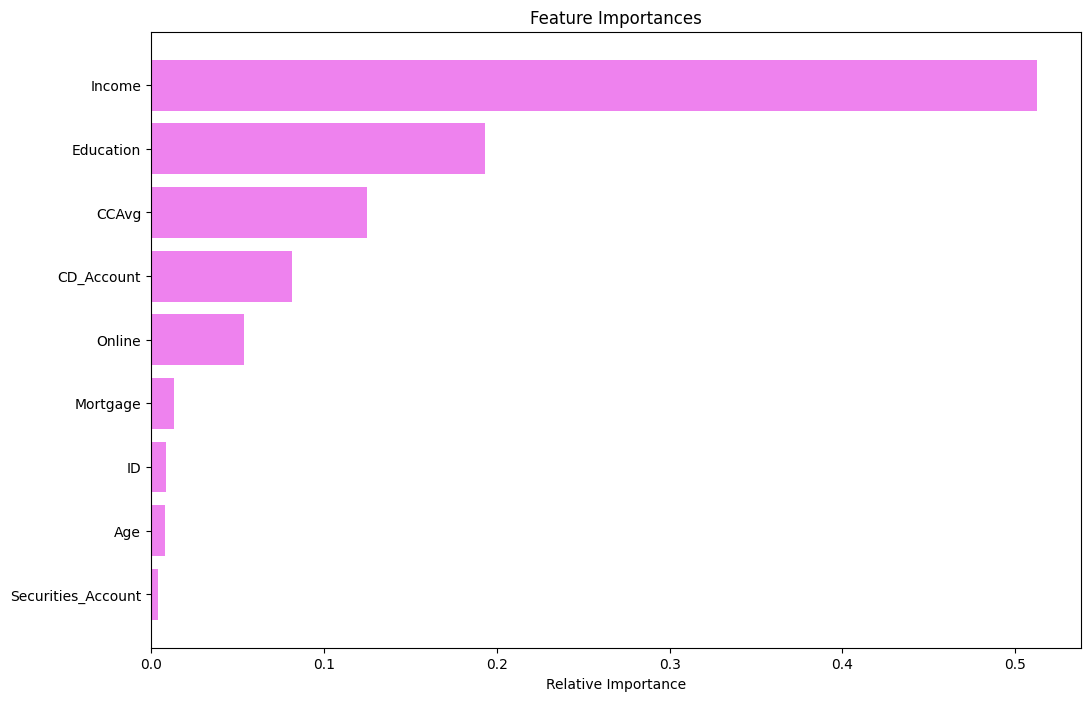

In [ ]:
# importance of features in the choosen tree
importances = prePruned_dtree.feature_importances_      # Calculate the importance of the features (Independent Variables)
importances = importances[importances[:] > 0]           # Take only the importances that are highiest than 0
indices = np.argsort(importances)                       # Sort the Importances by their index and descendent value
feature_names = list(X_dummies.columns)                 # Selecting the columns of all Independent Variables or Predictors

plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.barh(
    range(len(indices)),
    importances[indices],
    color="violet",
    align="center"
)
plt.yticks(
    range(len(indices)),
    [feature_names[i] for i in indices]
)
plt.xlabel("Relative Importance")
plt.tight_layout
plt.show()

#### **Observations:**
- As we analyzed in EDA, we can here confirm that Annual **Income**, **CCAvg** and **Education** are features or variable with a good correlation to predict if a Customer going to purchase a Personal Loan.

## **Actionable Insights and Business Recommendations**


* What recommedations would you suggest to the bank?
    - To predict the likelihood of a Customer purchase a **Personal Loan**, we can count with:
        - Annual income greater than or equal to 135K dollars;
        - Monthly average for credit card usage (CCAvg) more than 2.5K;
        - The People with a Professional/Advanced education.

    Those group will be more flexible to purchase a Personal Loan, as the plotted Tree and Text Rules of the Tree shows.

    The Actual AI Model have the capability to help the company predict very if a Customer going to purchase a Personal Loan or no, with prob. higher that *90%*.

___